# Тестовое задание для кандидата в команду валидации Альфа-Банка

**Привет!** На связи команда валидации Альфа-Банка. Мы отвечаем за то, чтобы модели, которые используются для принятия решений, были надежными, справедливыми и понятными. Твое задание — провести моделирование и валидацию кредитной модели. Удачи, и помни: мы верим в твои силы! 💪  

---

## Цель  
Проверить навыки анализа данных, валидации ML-моделей и умение формулировать выводы для бизнеса.  

---

## Датасет  
**Название:** [Give Me Some Credit](https://www.kaggle.com/c/GiveMeSomeCredit/data)  
**Описание:**  
Прогнозирование дефолта заемщика на основе финансовых и демографических признаков.  

**Признаки:**  
- `RevolvingUtilizationOfUnsecuredLines` (использование кредитных линий),  
- `age`, `MonthlyIncome`, `NumberOfDependents` и др.  

**Целевая переменная:** `SeriousDlqin2yrs` (дефолт: 0/1).  

---

## Задача  
Проведите валидацию модели кредитного скоринга (логистическая регрессия или градиентный бустинг) и подготовьте отчет.  

---

## Шаги  

### 1. Анализ и предобработка данных  
- Обработайте пропуски (например, в `MonthlyIncome`).  
- Исследуйте выбросы (например, возраст < 18 лет).  
- Визуализируйте распределения ключевых признаков.  
- Предложите методы борьбы с дисбалансом классов.  

### 2. Построение и оценка модели  
- Разделите данные на train/validation/test.  
- Обучите модель (логистическая регрессия или CatBoost/XGBoost).  
- Рассчитайте метрики: **AUC-ROC, Precision, Recall, F1-Score**.  
- Проверьте устойчивость модели через кросс-валидацию (5 folds).  

### 3. Интерпретация и этика  
- Выделите **топ-5 признаков**, влияющих на прогноз (SHAP/LIME).  
- Проверьте логичность влияния признаков (например, высокая долговая нагрузка → выше риск дефолта).  
- Оцените fairness модели: сравните метрики (FPR, TPR) для групп (например, **молодые** vs **старше 40 лет**).  

### 4. Отчет  
Подготовьте общие выводы по проведенной валидации, включив:  
- Выводы о качестве модели и её ограничениях.  
- Рекомендации по улучшению (например, сбор дополнительных данных).  
- Пример: *«Как изменится прогноз, если у заемщика появится иждивенец?»*  

---

## Технические требования  
- Язык: **Python** (Jupyter Notebook).  
- Код должен быть читаемым и содержать комментарии.  

---

## Критерии оценки  
1. Глубина анализа данных и обработки выбросов.  
2. Корректность выбранных метрик и их интерпретация.  
3. Качество визуализаций (распределения, важность признаков).  
4. Практичность рекомендаций в отчете.    

---

**Срок выполнения:** 7 дней.  
**Формат сдачи:**  
- Ноутбук в Collab/GitHub-репозиторий.    

---

Это задание покажет, как вы подходите к анализу реальных данных и делаете ML-модели прозрачными для бизнеса. Ждем твою работу! 🚀  

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

In [2]:
df_train = pd.read_csv('GiveMeSomeCredit-training.csv', sep = ',')

df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df_testing = pd.read_csv('GiveMeSomeCredit-testing.csv', sep = ',')

df_testing.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [4]:
df_train.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
df_testing.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [5]:
df_train.describe().round(decimals=2)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


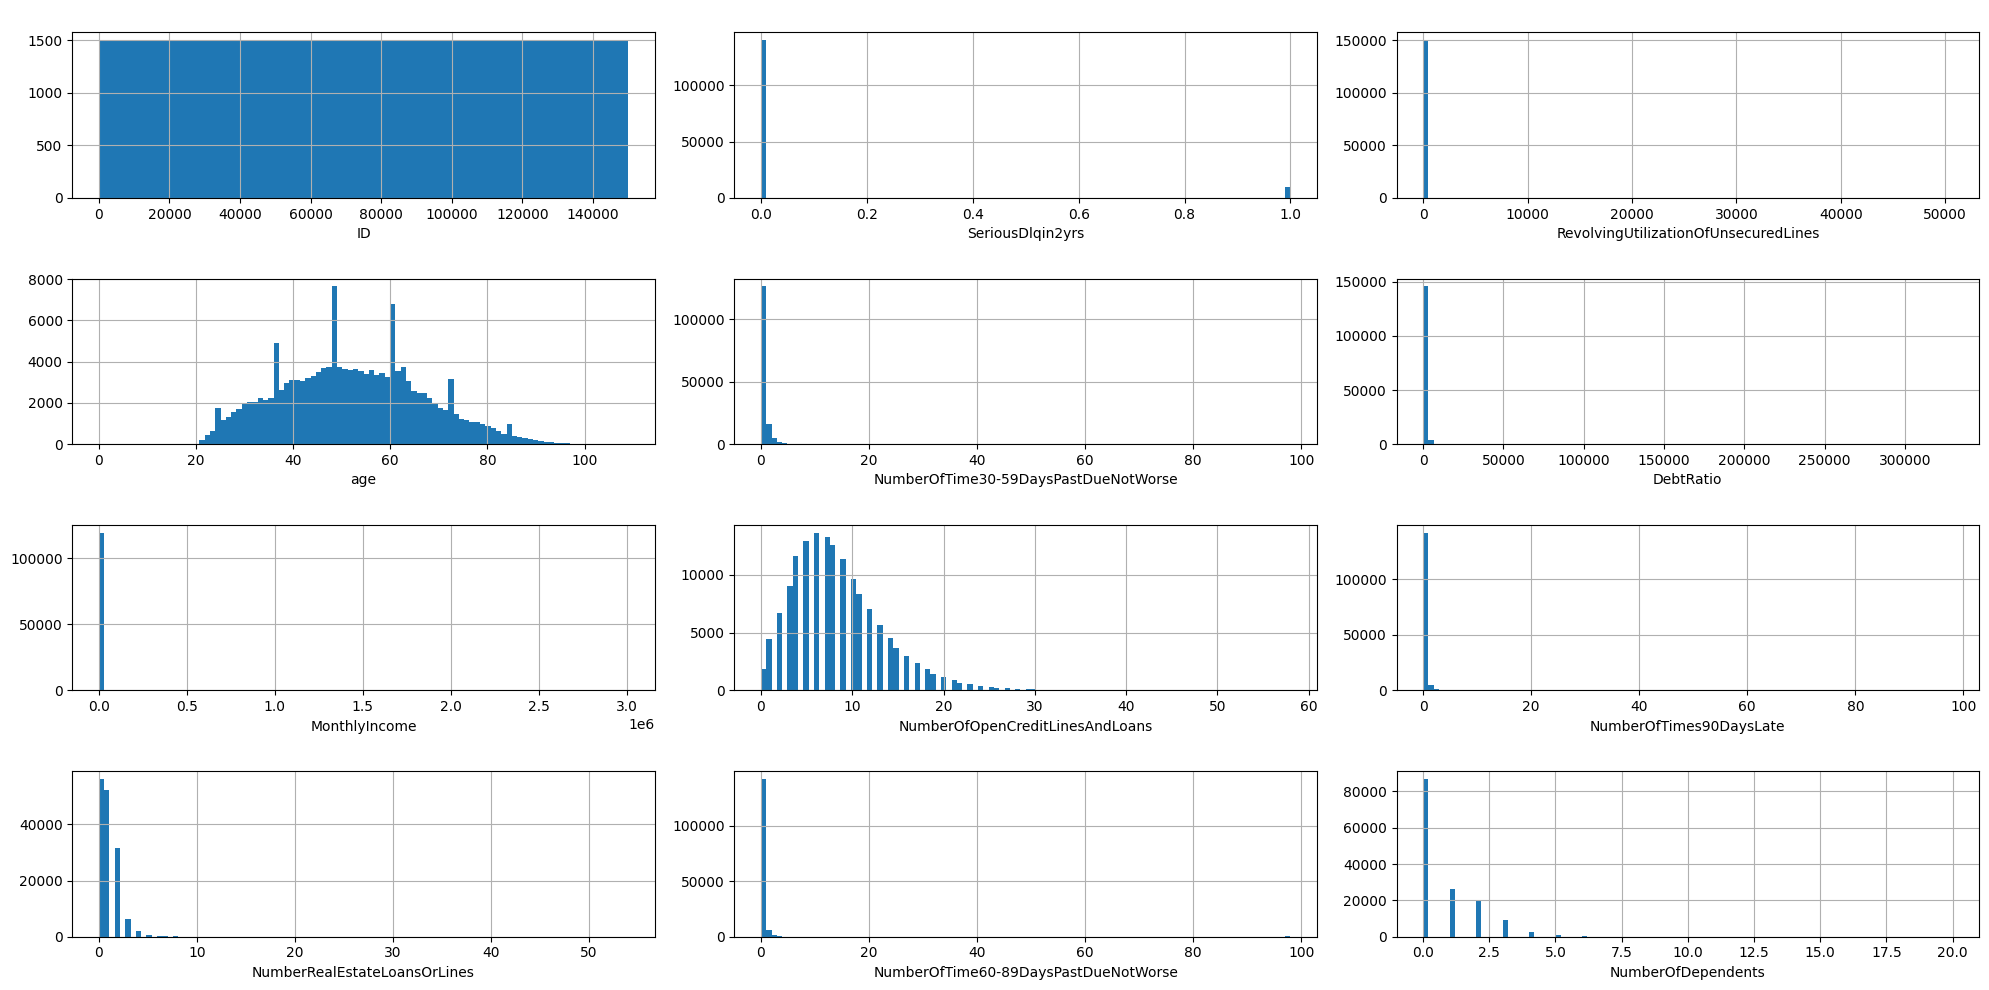

In [6]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(20, 10))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(bins=100, ax=ax)

        title_obj = ax.set_title(var_name + " Distribution", color='w')

        ax.set_xlabel(var_name, color='w')

        ax.xaxis.label.set_color('black')
        ax.yaxis.label.set_color('black')
        ax.tick_params(axis='x', colors='black')
        ax.tick_params(axis='y', colors='black')

    fig.tight_layout()
    plt.show()

draw_histograms(df_train, df_train.columns, 4, 3)

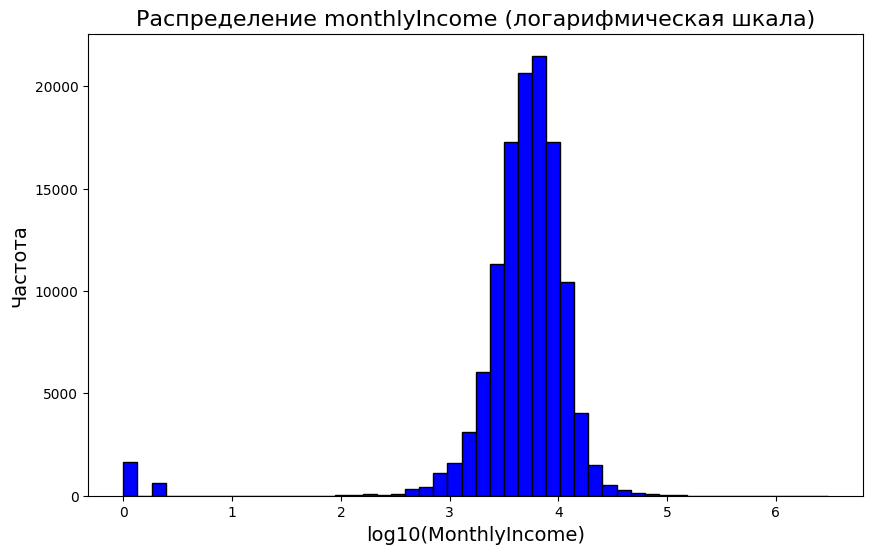

In [7]:
log_income = np.log10(df_train['MonthlyIncome'] + 1)  # +1 чтобы избежать log(0)

plt.figure(figsize=(10, 6))
plt.hist(log_income, bins=50, color='blue', edgecolor='black')

plt.title('Распределение monthlyIncome (логарифмическая шкала)', fontsize=16, color='black')
plt.xlabel('log10(MonthlyIncome)', fontsize=14, color='black')
plt.ylabel('Частота', fontsize=14, color='black')

plt.xticks(color='black')
plt.yticks(color='black')

plt.show()

распределение островершинное нормальное, null заменим на медиану

In [8]:
print(df_train.duplicated().value_counts())
print(df_testing.duplicated().value_counts())

False    150000
Name: count, dtype: int64
False    101503
Name: count, dtype: int64


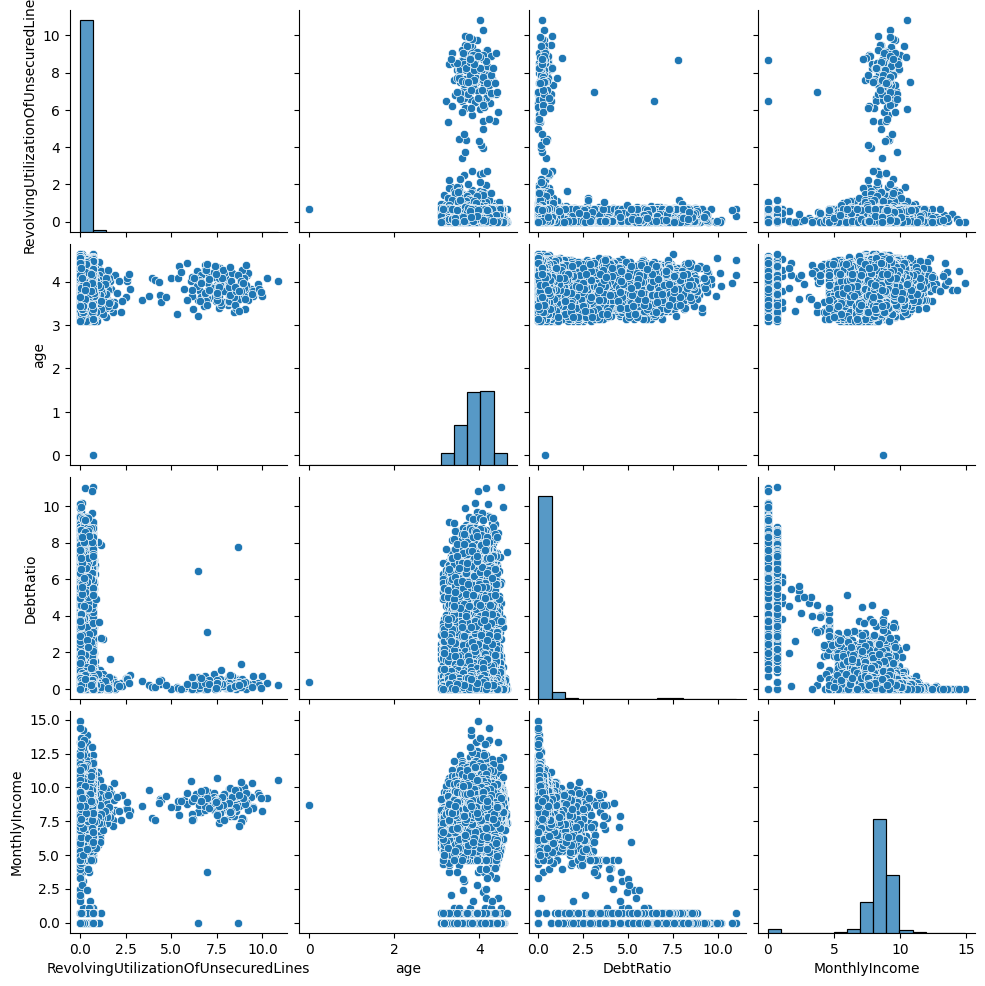

In [9]:
sns.pairplot(np.log(df_train[['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome']]+1).dropna(axis=0,how='any'),
             diag_kws=dict(bins=15,edgecolor='black'))

In [10]:
missing_values = df_train.isnull().sum()

# Вычисляем процент пропущенных значений
missing_percentage = (missing_values / len(df_train)) * 100

# Создаем DataFrame для удобного вывода
missing_info = pd.DataFrame({
    'Пропущенные значения': missing_values,
    'Процент пропусков': missing_percentage
})

# Выводим только те колонки, где есть пропуски
missing_info = missing_info[missing_info['Пропущенные значения'] > 0]

In [11]:
missing_info

,Пропущенные значения,Процент пропусков
MonthlyIncome,29731,19.820667
NumberOfDependents,3924,2.616000


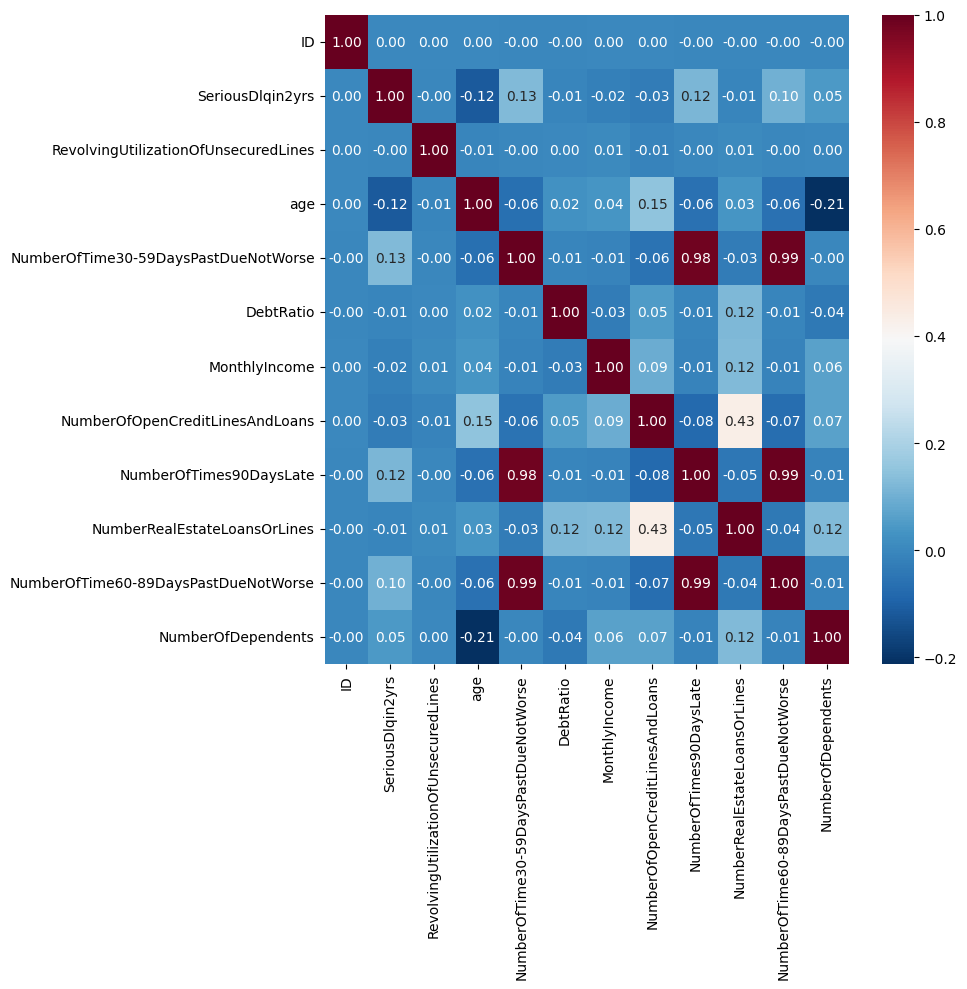

In [12]:
corr = df_train.corr()
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap = "RdBu_r",xticklabels=True, yticklabels=True, cbar=True)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
fig.tight_layout()
plt.show()

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

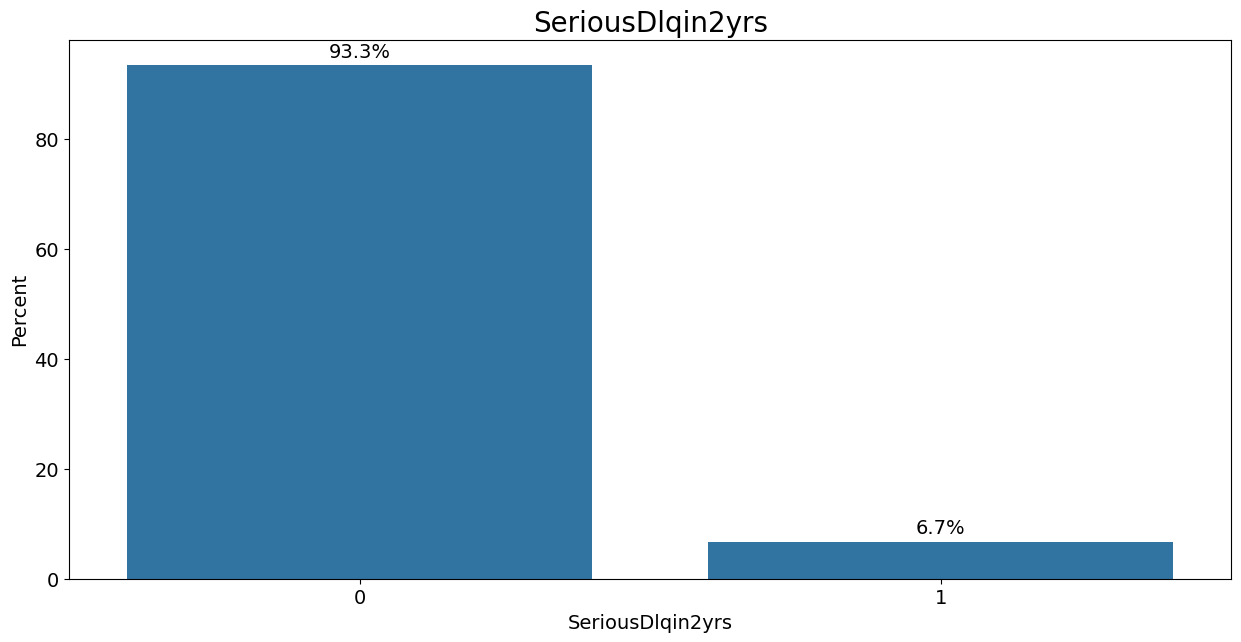

In [13]:

norm_target = (df_train['SeriousDlqin2yrs']
                              .value_counts(normalize=True)
                              .mul(100)
                              .rename('percent')
                              .reset_index())

plt.figure(figsize=(15,7))
ax = sns.barplot(x='SeriousDlqin2yrs', y='percent', data=norm_target)


for p in ax.patches:
  percentage = '{:.1f}%'.format(p.get_height())
  ax.annotate(percentage,
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha = 'center', # Centering
              va = 'center',
              xytext = (0, 10),
              textcoords = 'offset points',
              fontsize = 14)

plt.title('SeriousDlqin2yrs', fontsize = 20)
plt.xlabel('SeriousDlqin2yrs', fontsize = 14)
plt.ylabel('Percent', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

редактирование данных


In [14]:
df_train.loc[df_train['age'] < 18]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [15]:
df_train.loc[df_train['age'] == 0, 'age'] = df_train['age'].median()

всего 1 строка с аномальным возрастом

In [16]:
age_workforce = df_train.loc[(df_train['age'] >= 18) & (df_train['age'] <= 65)]
age_retired = df_train.loc[(df_train['age'] > 65)]
print("ср зарплата от 18 до 65 лет:  " + str(round(age_workforce['MonthlyIncome'].mean(),0)))
print("ср зарплата от 65 лет:  " + str(round(age_retired['MonthlyIncome'].mean(),0)))
print("мед зарплата от 18 до 65 лет:  " + str(round(age_workforce['MonthlyIncome'].median(),0)))
print("мед зарплата от 65 лет:  " + str(round(age_retired['MonthlyIncome'].median(),0)))

ср зарплата от 18 до 65 лет:  6770.0
ср зарплата от 65 лет:  6180.0
мед зарплата от 18 до 65 лет:  5500.0
мед зарплата от 65 лет:  4968.0


In [17]:
df_train['NumberOfDependents'].value_counts().sort_index()

,count
NumberOfDependents,
0.0,86902
1.0,26316
2.0,19522
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24


In [18]:
df_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index()

,count
NumberOfTime30-59DaysPastDueNotWorse,
0,126018
1,16033
2,4598
3,1754
4,747
5,342
6,140
7,54
8,25


In [19]:
df_train['NumberOfTimes90DaysLate'].value_counts().sort_index()

,count
NumberOfTimes90DaysLate,
0,141662
1,5243
2,1555
3,667
4,291
5,131
6,80
7,38
8,21


In [20]:
df_train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index()

,count
NumberOfTime60-89DaysPastDueNotWorse,
0,142396
1,5731
2,1118
3,318
4,105
5,34
6,16
7,9
8,2


96 и 98 раз, когда заемщик допускал просрочку платежа на 60–89 дней, но не более, за последние 2 года, звучит нереалистично

In [21]:
def replaceSpuriousValues96and98(data):
    new_data = data[data!=96]
    new_data = new_data[new_data!=98]

    new = []
    newval = new_data.median()
    for i in data:
        if (i == 96 or i == 98):
            new.append(newval)
        else:
            new.append(i)
    return new

df_train['NumberOfTime30-59DaysPastDueNotWorse'] = replaceSpuriousValues96and98(df_train['NumberOfTime30-59DaysPastDueNotWorse'])
df_train['NumberOfTimes90DaysLate'] = replaceSpuriousValues96and98(df_train['NumberOfTimes90DaysLate'])
df_train['NumberOfTime60-89DaysPastDueNotWorse'] = replaceSpuriousValues96and98(df_train['NumberOfTime60-89DaysPastDueNotWorse'])

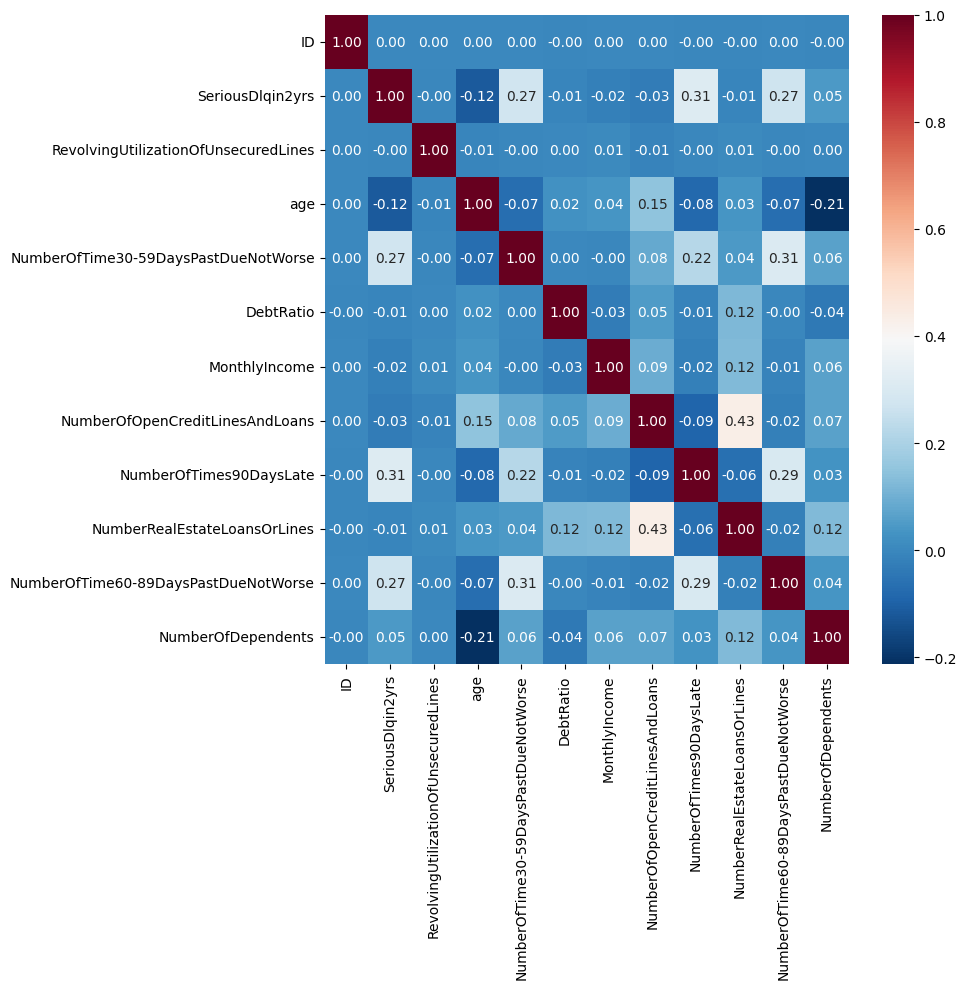

In [22]:
corr = df_train.corr()
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap = "RdBu_r",xticklabels=True, yticklabels=True, cbar=True)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
fig.tight_layout()
plt.show()

теперь нет сильной корреляции в просрочке платежей

In [23]:
df_train.loc[df_train['age'] == 0, 'age'] = df_train['age'].median()
df_train['MonthlyIncome'] = df_train['MonthlyIncome'].replace(np.nan,df_train['MonthlyIncome'].median())
df_train['NumberOfDependents'].fillna(df_train['NumberOfDependents'].median(), inplace=True)

df_testing.loc[df_testing['age'] == 0, 'age'] = df_testing['age'].median()
df_testing['MonthlyIncome'] = df_testing['MonthlyIncome'].replace(np.nan,df_testing['MonthlyIncome'].mean())
df_testing['NumberOfDependents'].fillna(df_testing['NumberOfDependents'].median(), inplace=True)

<ipython-input-23-5450cff84789>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['NumberOfDependents'].fillna(df_train['NumberOfDependents'].median(), inplace=True)
<ipython-input-23-5450cff84789>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

# обучение моделей

In [24]:

X = df_train.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
y = df_train['SeriousDlqin2yrs']

W = df_testing.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
z = df_testing['SeriousDlqin2yrs']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123, test_size = 0.25)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## лог. рег

In [26]:
logreg = LogisticRegression(random_state=123, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

logreg.fit(X_train_scaled, y_train)

logit_scores_proba = logreg.predict_proba(X_train_scaled)
preds = logit_scores_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)


roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
#print('AUC Score : ', round(roc_auc_score(y_test,preds),7))
print('AUC Score : ', round(roc_auc_score(y_train,preds),7))

0.8116500277402092
AUC Score :  0.81165


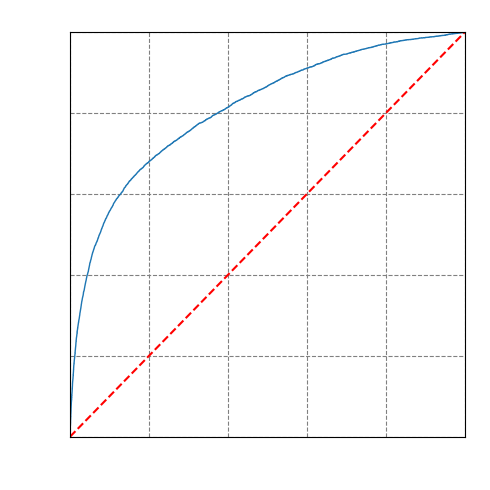

0.8116500277402092
AUC Score :  0.81165


In [27]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
plt.plot(fpr, tpr, linewidth=1)
plt.plot([0,1],[0,1], "r--")
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

title_obj = ax.set_title("ROC Curve")
plt.setp(title_obj, color='w')                     # Individual title colours.
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')       #set the color of xticks
ax.tick_params(axis='y', colors='white')       #set the color of yticks
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.grid(which='major', color='gray', linestyle='--')
fig.tight_layout()  # Improves appearance a bit.
plt.show()

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
#print('AUC Score : ', round(roc_auc_score(y_test,preds),7))
print('AUC Score : ', round(roc_auc_score(y_train,preds),7))

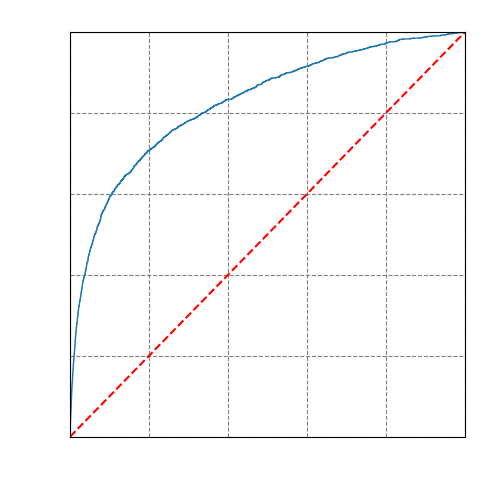

AUC Score :  0.8250861


In [28]:
#тест на новых данных

logit_scores_proba_val = logreg.predict_proba(X_test_scaled)
preds = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_test, preds)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
plt.plot(fpr_logit_val, tpr_logit_val, linewidth=1)
plt.plot([0,1],[0,1], "r--")
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

title_obj = ax.set_title("ROC Curve")
plt.setp(title_obj, color='w')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.grid(which='major', color='gray', linestyle='--')
fig.tight_layout()
plt.show()

print('AUC Score : ', round(roc_auc_score(y_test,preds),7))

In [30]:
import shap

In [31]:
masker = shap.maskers.Independent(X_train)

explainer = shap.LinearExplainer(logreg, masker)

shap_values = explainer(X_test)



# explainer = shap.LinearExplainer(logreg, X_train, feature_dependence="independent")
# shap_values = explainer(X_test)

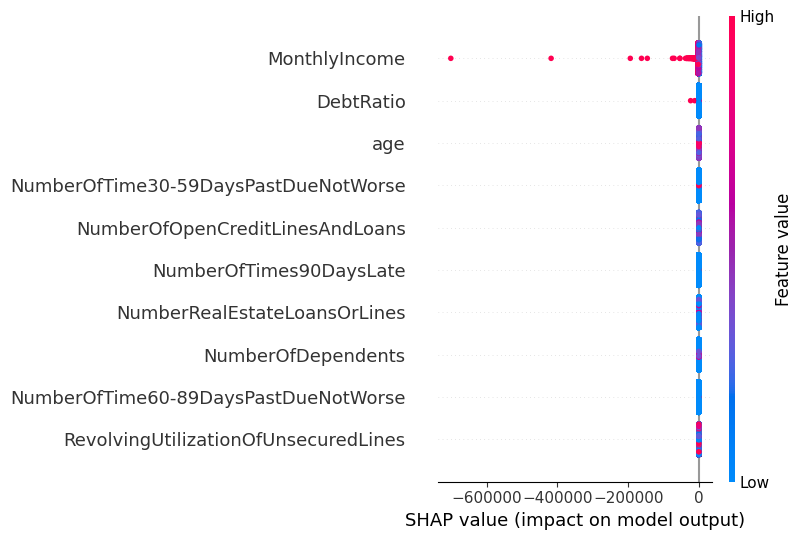

In [32]:
shap.summary_plot(shap_values, X_test)

Наиболее влиятельные факторы: месячный доход, кредитный рейтинг, возраст

In [33]:
from xgboost import XGBClassifier

In [34]:
#XG Boost
clf = XGBClassifier( random_state=123, n_estimators=150, learning_rate=0.05, max_depth=5)
clf.fit(X_train, y_train)
clf_scores_proba = clf.predict_proba(X_train)
clf_preds = clf_scores_proba[::,1]
fpr, tpr, thresh = roc_curve(y_train, clf_preds)


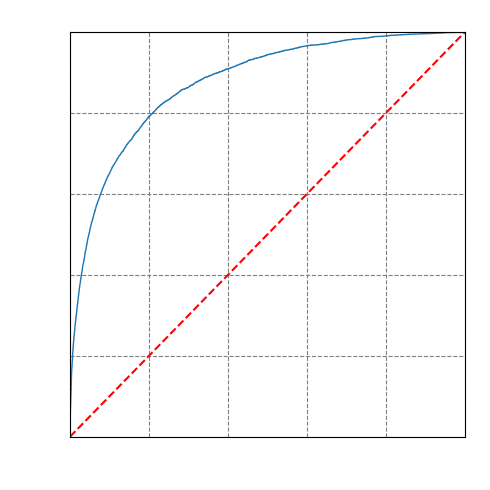

AUC Score :  0.875537122609487


In [35]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
plt.plot(fpr, tpr, linewidth=1)
plt.plot([0,1],[0,1], "r--")
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

title_obj = ax.set_title("ROC Curve")
plt.setp(title_obj, color='w')                     # Individual title colours.
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')       #set the color of xticks
ax.tick_params(axis='y', colors='white')       #set the color of yticks
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.grid(which='major', color='gray', linestyle='--')
fig.tight_layout()  # Improves appearance a bit.
plt.show()

print('AUC Score : ', (roc_auc_score(y_train,clf_preds)))

AUC-ROC для XGBoost: 0.8732


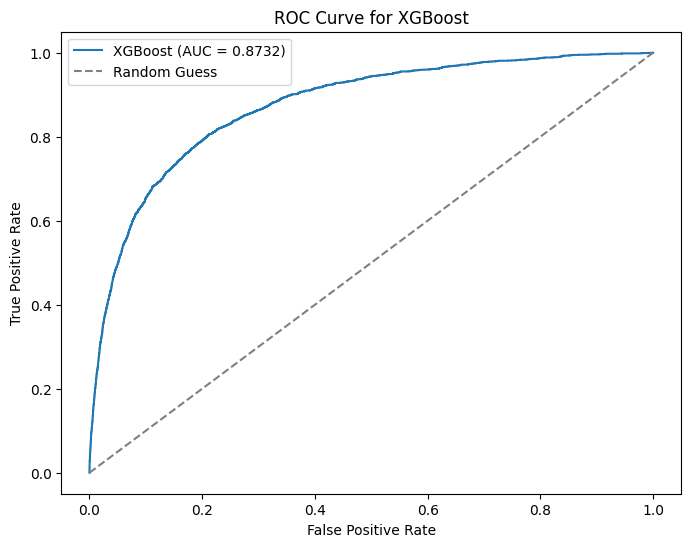

In [36]:
clf_scores_proba_test = clf.predict_proba(X_test)
clf_preds_test = clf_scores_proba_test[:, 1]


fpr_xgb, tpr_xgb, thresh_xgb = roc_curve(y_test, clf_preds_test)

from sklearn.metrics import auc
auc_xgb = auc(fpr_xgb, tpr_xgb)
print(f"AUC-ROC для XGBoost: {auc_xgb:.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import cross_validate

scoring = {
    "roc_auc": "roc_auc",
    "f1": "f1",
    "accuracy": "accuracy"
}

cv_results = cross_validate(
    clf,
    X_train,
    y_train,
    cv=5,
    scoring=scoring
)

print("ROC-AUC на каждом фолде:", cv_results["test_roc_auc"])
print("Среднее ROC-AUC:", cv_results["test_roc_auc"].mean())
print("Стандартное отклонение ROC-AUC:", cv_results["test_roc_auc"].std())

print("F1-Score на каждом фолде:", cv_results["test_f1"])
print("Среднее F1-Score:", cv_results["test_f1"].mean())
print("Стандартное отклонение F1-Score:", cv_results["test_f1"].std())

print("Accuracy на каждом фолде:", cv_results["test_accuracy"])
print("Среднее Accuracy:", cv_results["test_accuracy"].mean())
print("Стандартное отклонение Accuracy:", cv_results["test_accuracy"].std())

ROC-AUC на каждом фолде: [0.86474442 0.8553533  0.85872914 0.86250537 0.86680465]
Среднее ROC-AUC: 0.8616273763381876
Стандартное отклонение ROC-AUC: 0.004124435492331919
F1-Score на каждом фолде: [0.26742385 0.26470588 0.2587013  0.26734694 0.2720326 ]
Среднее F1-Score: 0.26604211486092993
Стандартное отклонение F1-Score: 0.004362815841358224
Accuracy на каждом фолде: [0.93693333 0.93555556 0.93657778 0.93617778 0.93648889]
Среднее Accuracy: 0.9363466666666668
Стандартное отклонение Accuracy: 0.00046307613431574823


100%|===================| 37441/37500 [03:12<00:00]       

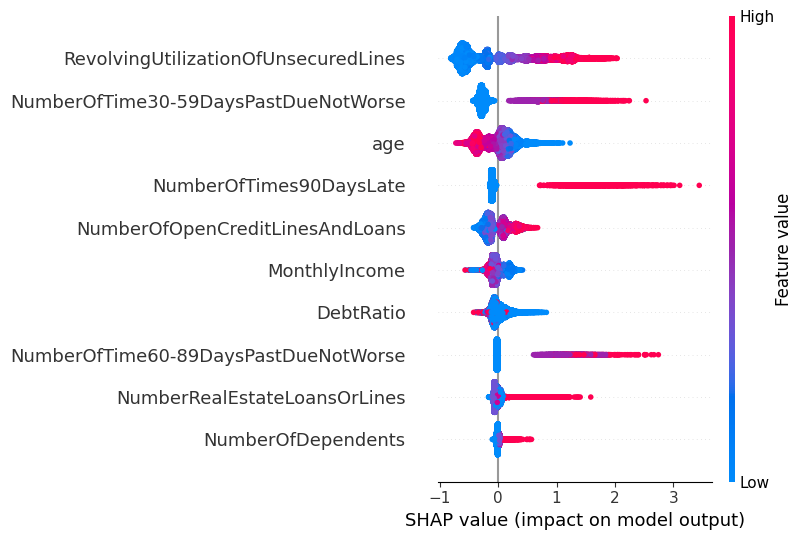

In [37]:
masker = shap.maskers.Independent(X_train)
explainer = shap.TreeExplainer(clf, masker)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

здесь возраст остался в топ-3 факторах, на первом месте - баланс на кредитных картах, на втором - количество раз за 2 года с просрочкой в 30-59 дней

Таким образом, в данных по месячной зарплате были заменены пропуски на медианное значение, так как имеются аномальные значения и распределение похоже на нормальное.

Также нереалистичные значения в количестве просрочек были заменены на медиану без учета этих аномальных значений.

Аномальный возраст был заменен на медианный (всего одна строка)

наблюдается дисбаланс классов - 93% против 7%, в таком случае поможет донабор данных, помеченных как дефолтные, оверсемплинг, установка scale_pos_weight в XG boost, кросс-валидация. В качестве метрики следует выбрать ROC-AUC или коэффициент Джинни.

Топ-5 факторов, влияющих на дефолт заемщика:

1) Общий баланс по кредитным картам и персональным кредитным линиям, за исключением ипотечных кредитов и долгов с рассрочкой платежа (например, автокредитов), поделенный на сумму кредитных лимитов, то есть долговая нагрузка, что логично.
2) Количество просроченных платежей за 2 года в течение 30-59 дней, что показывает возможность заемщика выплачивать долг.
3) Возраст, так как молодые заемщики имеют повышенный риск дефолта из-за низкой финансовой грамотности, также и с пенсионерами.
4) Количество случаев, когда заемщик просрочил платеж на 90 дней или более - показывает возможность заемщика платить вовремя.
5) Количество открытых займов (рассрочка, например, автокредит или ипотека) и кредитных линий (например, кредитные карты) - тоже отражает кредитную нагрузку.

